<a href="https://colab.research.google.com/github/badarunnisats/Deep-Learning-Projects/blob/main/cartoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install easygui

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 kB 5.5 MB/s eta 0:00:00


In [2]:
import cv2 #for image processing
import easygui #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path

import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

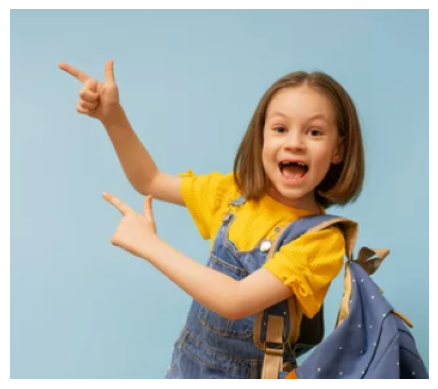

In [7]:
import matplotlib.pyplot as plt
import cv2

# Read and display an image
image = cv2.imread("/content/Image 2.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct color display

plt.imshow(image)
plt.axis("off")  # Hide axes
plt.show()


In [8]:
def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)

In [9]:
def cartoonify(ImagePath):
    # read the image
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    #print(image)  # image is stored in form of numbers

    # confirm that image is chosen
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()

    ReSized1 = cv2.resize(originalmage, (960, 900))
    #plt.imshow(ReSized1, cmap='gray')


    #converting an image to grayscale
    grayScaleImage= cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
    ReSized2 = cv2.resize(grayScaleImage, (960, 900))
    #plt.imshow(ReSized2, cmap='gray')


    #applying median blur to smoothen an image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ReSized3 = cv2.resize(smoothGrayScale, (960, 900))
    #plt.imshow(ReSized3, cmap='gray')

    #retrieving the edges for cartoon effect by using thresholding technique
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY, 9, 9)

    ReSized4 = cv2.resize(getEdge, (960, 900))
    #plt.imshow(ReSized4, cmap='gray')

    #applying bilateral filter to remove noise and keep edge sharp as required
    colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
    ReSized5 = cv2.resize(colorImage, (960, 900))
    #plt.imshow(ReSized5, cmap='gray')


    #masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

    ReSized6 = cv2.resize(cartoonImage, (960, 900))
    #plt.imshow(ReSized6, cmap='gray')

    # Plotting the whole transition
    images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]

    fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')

    save1=Button(top,text="Save cartoon image",command=lambda: save(ReSized6, ImagePath),padx=30,pady=5)
    save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
    save1.pack(side=TOP,pady=50)

    plt.show()

In [10]:
import cv2
import os
import tkinter as tk
from tkinter import filedialog, messagebox, Button
from PIL import Image, ImageTk

# Initialize the Tkinter window
top = tk.Tk()
top.geometry('400x400')
top.title('Cartoonify Your Image!')
top.configure(background='white')

# Function to save the cartoonified image
def save(ReSized6, ImagePath):
    newName = "cartoonified_Image"
    path1 = os.path.dirname(ImagePath)
    extension = os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName + extension)

    # Save the image
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))

    message = f"Image saved by name {newName} at {path}"
    messagebox.showinfo(title="Saved", message=message)

# Function to upload an image
def upload():
    file_path = filedialog.askopenfilename()
    if file_path:
        messagebox.showinfo(title="Uploaded", message="Image selected: " + file_path)

# Create a button for uploading
upload_button = Button(top, text="Cartoonify an Image", command=upload, padx=10, pady=5)
upload_button.configure(background='#364156', foreground='white', font=('calibri', 10, 'bold'))
upload_button.pack(side=tk.TOP, pady=50)

# Run the Tkinter loop
top.mainloop()

TclError: no display name and no $DISPLAY environment variable